In [9]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_480\3275534910.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [10]:
filename = 'data/tr_eikon_eod_data.csv'

In [11]:
f = open(filename, 'r')

In [12]:
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [13]:
sym = 'AAPL.O'
data_2 = pd.DataFrame(data[sym]).dropna()

In [14]:
data_2.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [15]:
# short term SMA
data_2['SMA1'] = data_2[sym].rolling(window=42).mean()

In [18]:
# longer term SMA
data_2['SMA2'] = data_2[sym].rolling(window=252).mean()

In [19]:
data_2

,AAPL.O,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
...,...,...,...
2018-06-25,182.170000,185.606190,168.265556
2018-06-26,184.430000,186.087381,168.418770
2018-06-27,184.160000,186.607381,168.579206


In [20]:
data_2.dropna().head(100)

,AAPL.O,SMA1,SMA2
Date,,,
2010-12-31,46.079954,45.280967,37.120735
2011-01-03,47.081381,45.349708,37.186246
2011-01-04,47.327096,45.412599,37.252521
2011-01-05,47.714238,45.466102,37.322266
2011-01-06,47.675667,45.522565,37.392079
...,...,...,...
2011-05-18,48.552809,48.983497,43.515114
2011-05-19,48.647094,48.987681,43.573373
2011-05-20,47.888524,48.967340,43.626037


In [21]:
data_2[[sym, 'SMA1', 'SMA2']].tail(10)

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-18,188.74,183.358810,167.489325
2018-06-19,185.69,183.665714,167.645476
2018-06-20,186.50,184.160476,167.810119
2018-06-21,185.46,184.641905,167.967222
2018-06-22,184.92,185.165238,168.123135
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627


<Axes: xlabel='Date'>

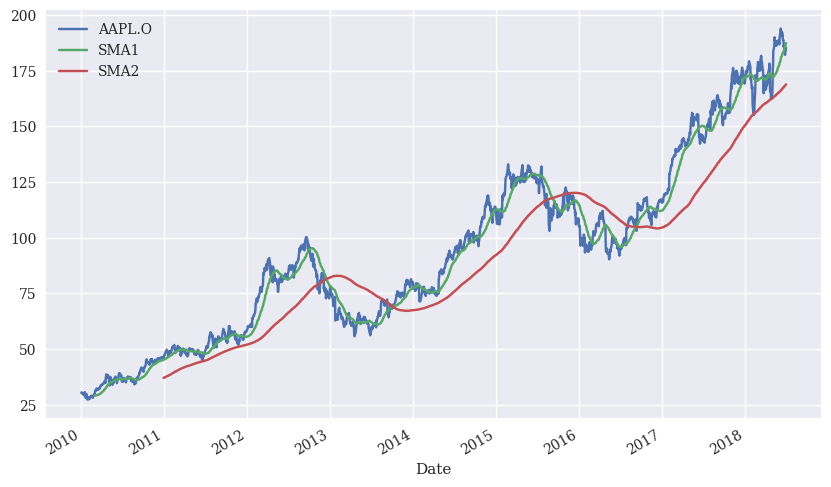

In [23]:
data_2[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

n this context, the SMAs are only a means to an end. They are used to derive positions to implement a trading strategy. Figure 8-7 visualizes a long position by a value of 1 and a short position by a value of -1. The change in the position is triggered (visually) by a crossover of the two lines representing the SMA time serie

In [27]:
data_2.dropna(inplace=True)
data_2['positions'] = np.where(data_2['SMA1'] > data_2['SMA2'],1,-1)

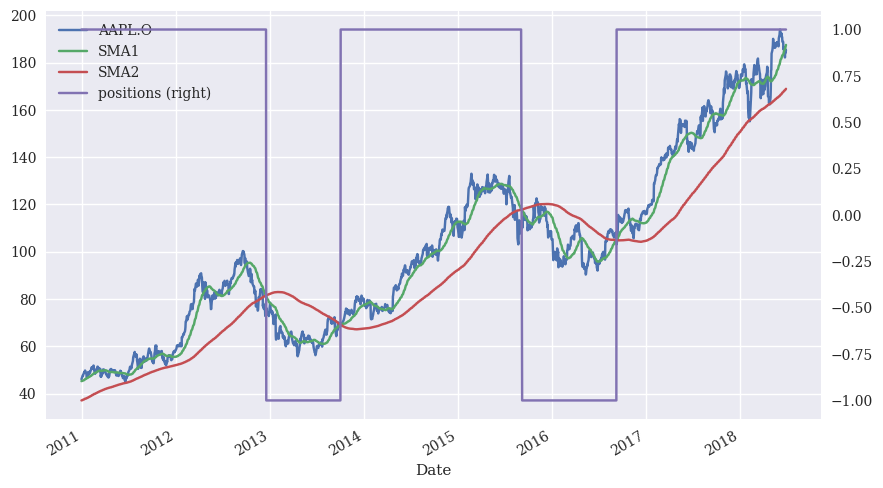

In [28]:
ax = data_2[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')